In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from MEM import MEM
from sklearn.metrics import accuracy_score

# random data tests

In [2]:
N = 15 
m = 10
X = np.random.rand(N, m)
y = (np.random.randint(0, 2, N) - 1/2)*2

In [3]:
clf = MEM(lmbda=0.1)
clf.fit(X, y)
accuracy_score(np.sign(clf.predict(X)), y)

0.8666666666666667

In [4]:
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14, 9)

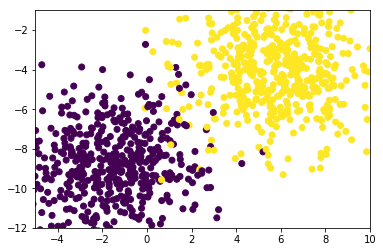

In [5]:
N, m = 1000, 2
(X,y) =  make_blobs(n_samples=N,n_features=m,centers=2,cluster_std=2.05,random_state=40)
#we need to add 1 to X values (we can say its bias)
X1 = np.c_[np.ones((X.shape[0])),X]
y = (y - 0.5)*2

plt.scatter(X1[:,1],X1[:,2],marker='o',c=y)
plt.axis([-5,10,-12,-1])
plt.show()

In [6]:
from pytan import CLGBayesNetClassifier

In [7]:
clf = CLGBayesNetClassifier(alpha=10)

clf.fit(X,y)

TypeError: __init__() got an unexpected keyword argument 'alpha'

In [24]:
accuracy_score(y, clf.predict(X))

/opt/conda/lib/python3.6/site-packages/pytan-0.1.0-py3.6.egg/pytan/_utils.py:46: RuntimeWarning: divide by zero encountered in true_divide
/opt/conda/lib/python3.6/site-packages/pytan-0.1.0-py3.6.egg/pytan/_utils.py:46: RuntimeWarning: invalid value encountered in true_divide
/opt/conda/lib/python3.6/site-packages/pytan-0.1.0-py3.6.egg/pytan/_utils.py:46: RuntimeWarning: divide by zero encountered in log
/opt/conda/lib/python3.6/site-packages/pytan-0.1.0-py3.6.egg/pytan/_utils.py:46: RuntimeWarning: invalid value encountered in subtract


0.6

In [8]:
clf = MEM(lmbda=0.1)
clf.fit(X, y)
accuracy_score(np.sign(clf.predict(X)), y)

0.981

In [536]:
clf.predict_proba(X)

array([1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 6.45504098e-01, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
      

## proba

# read datasets

In [9]:
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder

it will be grate to add credit, promoters

In [10]:
dataset_names = ['house-votes-84']#[elem.split('.')[0] for elem in os.listdir('data')]
dataset_names = [f'{name}.data' for name in dataset_names]

In [11]:

dfs = []
for elem in dataset_names:
    if elem.endswith('.data'):
        dfs.append(pd.read_csv('data/' + elem, header=None).replace('?', np.nan))
        dfs[-1].fillna(dfs[-1].mode().iloc[0], inplace=True)
        print(elem, ' ', len(dfs[-1]))
    
# columns = list(dfs[0].columns)
# columns = columns[1:] + [columns[0]]
# ind = dataset_names.index('house-votes-84')
# dfs[ind] = dfs[ind].reindex(columns=columns)

# ind = dataset_names.index('adult')
# dfs[ind] = dfs[ind].drop([2], axis=1)

house-votes-84.data   435


In [12]:
def extract_data(df, discrete=False):
    df = df.drop([df.columns[-1]], axis=1)
    if discrete:
        X = pd.get_dummies(df, columns=df.columns).values
    else:
        X = pd.get_dummies(df).values
    y = df[df.columns[-1]].values
    return X, y

In [13]:
lb = LabelEncoder()
data = []
for df in dfs:
    X, y = extract_data(df)
    y = (lb.fit_transform(y) - 0.5)*2
    data.append([X, y])

In [14]:
lb = LabelEncoder()
discrete_data = []
for df in dfs:
    X, y = extract_data(df, True)
    y = (lb.fit_transform(y) - 0.5)*2
    discrete_data.append([X, y])

In [15]:
data[0][0].shape, data[0][1].shape

((435, 32), (435,))

# set up experiment

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook as tqdm

In [17]:
def process_clf(clf, num_iters, data=data):
    results = [[] for _ in range(len(data))]
    for i in tqdm(range(num_iters)):
        for j, (X, y) in enumerate(data):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
            clf.fit(X_train, y_train)
            results[j].append(1 - accuracy_score(y_test, clf.predict(X_test)))
    results = np.array(results)
    mean, var = results.mean(axis=1), results.var(axis=1)
    for name, vmean, vvar in zip(dataset_names, mean, var):
        print(f'{name:<15} mean: {vmean:<5},\t var: {vvar}')
    return 

In [521]:
process_clf(LogisticRegression(solver='lbfgs', max_iter=300), 100)

house-votes-84  mean: 0.038473282442748086,	 var: 0.0002260008158032744
hepatitis       mean: 0.3427659574468086,	 var: 0.002932503395201449
kr-vs-kp        mean: 0.03688216892596451,	 var: 3.948445167400454e-05
adult           mean: 0.2018865799979527,	 var: 3.5711799985751346e-05


In [18]:
process_clf(MEM(), 3)


house-votes-84.data mean: 0.0  ,	 var: 0.0


In [11]:
from sklearn.svm import SVC

In [14]:
process_clf(SVC(kernel='linear'), 3)


house-votes-84  mean: 0.050890585241730256,	 var: 1.2949258331229122e-05
hepatitis       mean: 0.3404255319148936,	 var: 0.000905387052965142
kr-vs-kp        mean: 0.03058741744873128,	 var: 4.083541527503065e-05
adult           mean: 0.20053229603848907,	 var: 1.6437298762501597e-05


# DRC

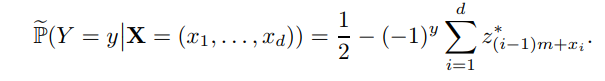

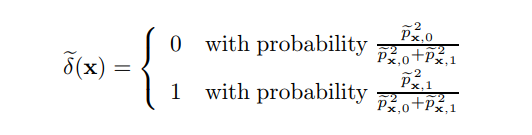

In [90]:
from DRC import DRC

In [94]:
clf = DRC()
clf.fit(X, y)
accuracy_score(clf.predict(X), y)

1.0

In [ ]:
process_clf(DRC(), 3, discrete_data)

In [106]:
clf = DRC()
num_iters = 3
results = [[] for _ in range(len(data[::2]))]
for i in tqdm(range(num_iters)):
    for j, (X, y) in enumerate(data[::2]):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
        clf.fit(X_train, y_train)
        results[j].append(1 - accuracy_score(y_test, clf.predict(X_test)))
results = np.array(results)
mean, var = results.mean(axis=1), results.var(axis=1)
for name, vmean, vvar in zip(dataset_names[::2], mean, var):
    print(f'{name:<15} mean: {vmean:<5},\t var: {vvar}')


house-votes-84  mean: 0.050890585241730256,	 var: 1.2949258331229122e-05
kr-vs-kp        mean: 0.06256517205422318,	 var: 8.69866834261008e-06


# TAN

In [ ]:
process_clf(pytan.DiscreteBayesNetClassifier(), 3, discrete_data)